In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from merge_data import merge_data
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress


In [2]:
cap_df, con_df = merge_data()

In [4]:
cap_df.head()

,Country,Year,HDI,Population,capacity_mw,cap_added,Region
0,Algeria,1990,0.577,25.758869,0.00,0.00,Africa
1,Argentina,1990,0.704,32.618651,761.02,761.02,South/Central America
2,Armenia,1990,0.631,3.538171,0.00,0.00,
3,Austria,1990,0.795,7.677850,13.00,13.00,Europe
4,Bahrain,1990,0.746,0.495931,0.00,0.00,


In [9]:
lin_df = pd.merge(cap_df,con_df).dropna()
cap = lin_df['cap_added']/lin_df['Population']
con = lin_df['energy']/lin_df['Population']

In [10]:
e_slope, e_int, e_r, e_p, _std_err = linregress(cap,con)
print('slope: '+ str(e_slope) +' intercept: ' + str(e_int) + ' p: '+str(e_p) )

slope: -0.032955578037801955 intercept: 6.10184841038641 p: 0.40959451810582626


<IPython.core.display.Javascript object>


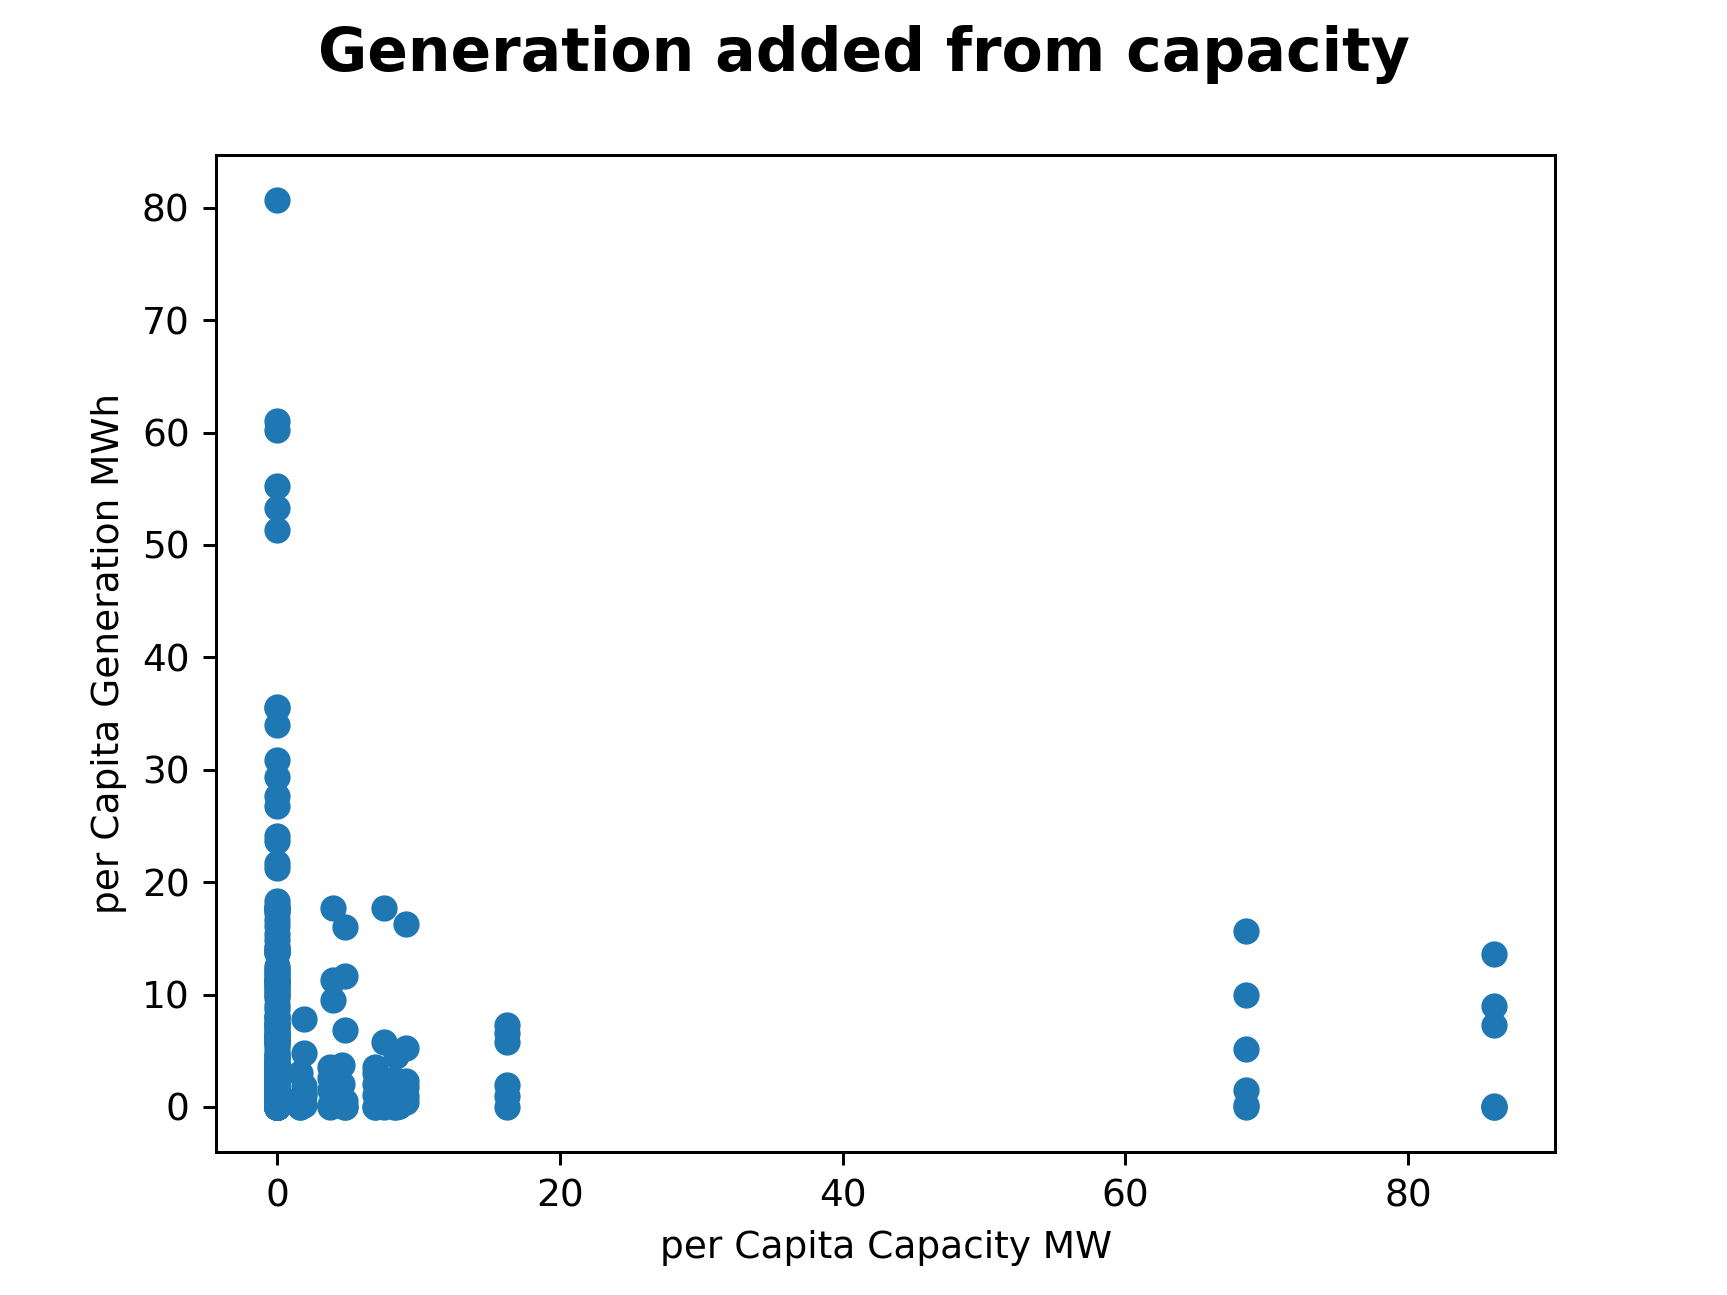

Text(0, 0.5, 'per Capita Generation MWh')

In [12]:
# Plot
plt.scatter(cap,con)
plt.suptitle("Generation added from capacity", fontsize=16, fontweight="bold")
plt.xlabel("per Capita Capacity MW")
plt.ylabel("per Capita Generation MWh")



In [18]:
for r in set(lin_df['Region']):
    reg_df = lin_df[lin_df['Region']==r]
    e_slope, e_int, e_r, e_p, _std_err = linregress(reg_df['capacity_mw'],reg_df['HDI'])
    print(r+': ' + 'slope: '+ str(e_slope) +' intercept: ' + str(e_int) + ' p: '+str(e_p) )

Middle East: slope: 5.969248705012366e-07 intercept: 0.8053965692162278 p: 0.14469237533202978
CIS: slope: -0.00011138843203734245 intercept: 1.0454251078731402 p: 4.0079920056350065e-17
Africa: slope: 1.480042280361926e-06 intercept: 0.6899466322374992 p: 0.5858115312792265
North America: slope: nan intercept: nan p: 1.0
Europe: slope: 6.606677353974628e-07 intercept: 0.8809277520203085 p: 0.09810296813321263
South/Central America: slope: 3.6128875538453096e-08 intercept: 0.7650133332718577 p: 0.8104672672504267
Asia Pacific: slope: 2.491196650846374e-09 intercept: 0.7332043432678679 p: 0.9527438384633762


In [19]:
for r in set(lin_df['Region']):
    reg_df = lin_df[lin_df['Region']==r]
    e_slope, e_int, e_r, e_p, _std_err = linregress(reg_df['energy'],reg_df['HDI'])
    print(r+': ' + 'slope: '+ str(e_slope) +' intercept: ' + str(e_int) + ' p: '+str(e_p) )

Middle East: slope: 4.787263327353808e-06 intercept: 0.8169305193375426 p: 0.8171622519153258
CIS: slope: 3.422647296630043e-05 intercept: 0.7527803481840417 p: 0.615124302276556
Africa: slope: 4.72207033870995e-06 intercept: 0.7033232828710589 p: 0.8648936499365036
North America: slope: 0.0 intercept: 0.926 p: 1.0
Europe: slope: 1.3642886136345741e-05 intercept: 0.8847165836958113 p: 0.4178456492055763
South/Central America: slope: 4.462379322785925e-06 intercept: 0.7648643789103183 p: 0.7629841573571269
Asia Pacific: slope: 1.0767566255316179e-06 intercept: 0.7326032549894744 p: 0.8065872654605305
